In [1]:
import wfdb
import os
import matplotlib.pyplot as plt
from wfdb import processing
import numpy as np
import pandas as pd
os.chdir(r'C:\Users\owner\Desktop\mit-bih-arrhythmia-database-1.0.0')

In [2]:
directory = os.listdir()
directory = list(map(lambda x : x.split('.')[0] , directory))
#remove files that found in folder and not important to signal
directory.remove('102-0')
directory.remove('output')
directory.remove('RECORDS')
directory.remove('mitdbdir')
directory.remove('ANNOTATORS')
directory.remove('SHA256SUMS')
directory.remove('mit-bih-arrhythmia-database-1')
directory.remove( 'x_mitdb')
directory.remove( 'csv-files')
directory.remove( 'combined_file')

directory = set(directory)
directory = list(directory)
directory

['234',
 '208',
 '122',
 '113',
 '210',
 '220',
 '221',
 '230',
 '102',
 '232',
 '215',
 '107',
 '119',
 '228',
 '231',
 '103',
 '101',
 '219',
 '201',
 '212',
 '108',
 '109',
 '121',
 '223',
 '205',
 '202',
 '118',
 '104',
 '124',
 '233',
 '117',
 '213',
 '214',
 '222',
 '111',
 '203',
 '207',
 '100',
 '209',
 '114',
 '217',
 '112',
 '200',
 '116',
 '115',
 '105',
 '106',
 '123']

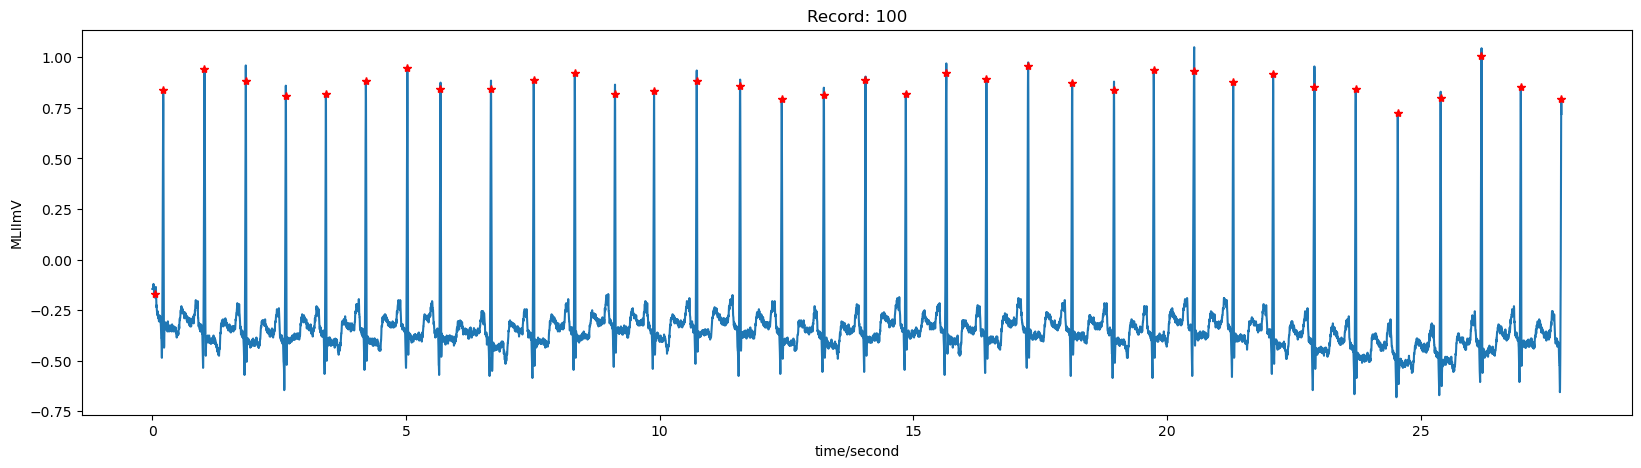

In [3]:
record = wfdb.rdrecord('100' , sampto=10000   ,channels=[0])
ann = wfdb.rdann('100' , 'atr' , sampto=10000)
wfdb.plot_wfdb(record , annotation=ann ,figsize=(20 , 5))

In [4]:
record.__dict__
#ann.__dict__

{'record_name': '100',
 'n_sig': 1,
 'fs': 360,
 'counter_freq': None,
 'base_counter': None,
 'sig_len': 10000,
 'base_time': None,
 'base_date': None,
 'comments': ['69 M 1085 1629 x1', 'Aldomet, Inderal'],
 'sig_name': ['MLII'],
 'p_signal': array([[-0.145],
        [-0.145],
        [-0.145],
        ...,
        [ 0.71 ],
        [ 0.795],
        [ 0.72 ]]),
 'd_signal': None,
 'e_p_signal': None,
 'e_d_signal': None,
 'file_name': ['100.dat'],
 'fmt': ['212'],
 'samps_per_frame': [1],
 'skew': [None],
 'byte_offset': [None],
 'adc_gain': [200.0],
 'baseline': [1024],
 'units': ['mV'],
 'adc_res': [11],
 'adc_zero': [1024],
 'init_value': [995],
 'checksum': [8548],
 'block_size': [0]}

In [5]:
def extract_beats_and_labels(sig_directory):
    window_size = 256
    Full_Signal = wfdb.rdrecord(sig_directory ,sampto=100000   ,channels=[0] )
    Full_Signal =  Full_Signal.__dict__['p_signal'].flatten()
    ann    = wfdb.rdann(sig_directory ,'atr' , sampto=100000 )
    ann_pos =ann.__dict__['sample'][2:-1]
    ann_sym =ann.__dict__['symbol'][2:-1]
    #return ann_sym , ann_pos
    data_Full = []
    data_Sym = []
    for QRS_pos ,Beat_diagnose in zip(ann_pos , ann_sym):
        start  = QRS_pos-window_size//2
        end  = QRS_pos + window_size // 2
        signal_corpus= Full_Signal[start:end]
        if len(signal_corpus) ==256 :
            #print(len(signal_corpus))
            data_Full.append(list(signal_corpus))
            data_Sym.append(Beat_diagnose)
    return data_Full , data_Sym 
    #return ann_pos , ann_sym

In [6]:
X=[]
Y=[]
for i in directory:
    Full_Signal , annotation_symbol = extract_beats_and_labels(i)
    X.extend(Full_Signal)
    Y.extend(annotation_symbol)
X = np.array(X)
Y = np.array(Y)

In [7]:
X.shape , Y.shape

((17243, 256), (17243,))

In [8]:
X.shape

(17243, 256)

In [9]:
File_signal = np.c_[X,Y]

In [10]:
File_signal

array([['0.04', '0.045', '0.04', ..., '0.02', '0.03', 'N'],
       ['0.03', '0.035', '0.035', ..., '-0.02', '-0.01', 'N'],
       ['-0.02', '-0.03', '-0.03', ..., '-0.045', '-0.035', 'N'],
       ...,
       ['-0.84', '-0.835', '-0.855', ..., '-0.38', '-0.395', 'N'],
       ['-0.775', '-0.78', '-0.79', ..., '-0.51', '-0.535', 'N'],
       ['-0.855', '-0.845', '-0.855', ..., '-0.58', '-0.605', 'N']],
      dtype='<U32')

In [11]:
import csv

In [65]:
def array_to_csv(array, filename):
    with open(filename, 'w', newline='') as csvfile:
        csv_writer = csv.writer(csvfile)
        csv_writer.writerows(array)



array_to_csv(File_signal, 'output.csv')

In [66]:
current_directory = os.getcwd()

csv_file_path = os.path.join(current_directory, 'output.csv')

print("CSV file path:", csv_file_path)

CSV file path: C:\Users\owner\Desktop\mit-bih-arrhythmia-database-1.0.0\output.csv


In [67]:
df = pd.read_csv(r'C:\Users\owner\Desktop\mit-bih-arrhythmia-database-1.0.0\output.csv' , header = None)

In [68]:
df

,0,1,2,3,4,5,6,7,8,9,...,247,248,249,250,251,252,253,254,255,256
0,0.040,0.045,0.040,0.045,0.045,0.030,0.020,0.030,0.020,0.025,...,0.015,0.010,0.000,-0.005,-0.005,-0.005,0.005,0.020,0.030,N
1,0.030,0.035,0.035,0.040,0.045,0.025,0.025,0.015,0.010,0.000,...,-0.045,-0.060,-0.065,-0.060,-0.060,-0.045,-0.030,-0.020,-0.010,N
2,-0.020,-0.030,-0.030,-0.020,-0.025,-0.015,-0.020,-0.015,-0.015,-0.020,...,0.000,-0.010,-0.010,-0.020,-0.030,-0.030,-0.040,-0.045,-0.035,N
3,-0.020,-0.025,-0.030,-0.035,-0.030,-0.010,0.000,-0.010,-0.010,-0.020,...,0.000,-0.015,-0.025,-0.025,-0.030,-0.030,-0.030,-0.025,-0.025,N
4,0.010,0.000,0.000,-0.015,-0.025,-0.025,-0.030,-0.030,-0.030,-0.025,...,-0.090,-0.085,-0.080,-0.075,-0.065,-0.050,-0.040,-0.045,-0.055,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17238,-0.855,-0.855,-0.855,-0.870,-0.865,-0.880,-0.825,-0.825,-0.830,-0.825,...,-0.420,-0.440,-0.450,-0.485,-0.520,-0.550,-0.570,-0.595,-0.620,N
17239,-0.820,-0.830,-0.845,-0.855,-0.870,-0.885,-0.870,-0.855,-0.845,-0.825,...,-0.370,-0.365,-0.365,-0.395,-0.425,-0.430,-0.470,-0.495,-0.525,N
17240,-0.840,-0.835,-0.855,-0.845,-0.840,-0.835,-0.845,-0.850,-0.870,-0.880,...,-0.285,-0.305,-0.325,-0.325,-0.345,-0.355,-0.370,-0.380,-0.395,N
17241,-0.775,-0.780,-0.790,-0.800,-0.810,-0.815,-0.800,-0.805,-0.790,-0.790,...,-0.380,-0.380,-0.395,-0.400,-0.425,-0.450,-0.480,-0.510,-0.535,N


In [16]:
first_raw = df.iloc[1000,:-1]

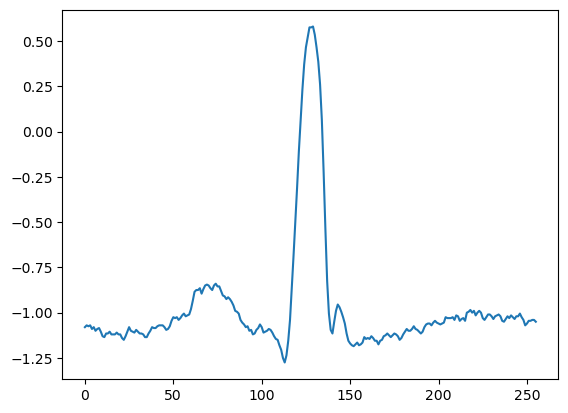

In [17]:
plt.plot(first_raw)

In [18]:
df.iloc[:,-1].value_counts()

256
N    11791
R     1257
L     1087
V     1041
/     1015
A      235
+      182
F      170
f      149
!      122
~      106
"       31
|       27
a        7
x        6
Q        5
[        5
]        4
e        2
J        1
Name: count, dtype: int64

In [19]:
normal_filter = df.loc[::,256] =='N'

In [20]:
normal_data=df[normal_filter]

In [21]:
normal_filter . sum()

11791

In [22]:
abnormal_filter = df.loc[::,256] != 'N'

In [23]:
abnormal_data=df[abnormal_filter]

In [24]:
abnormal_filter . sum()

5452

In [25]:
df[normal_filter]

,0,1,2,3,4,5,6,7,8,9,...,247,248,249,250,251,252,253,254,255,256
0,0.040,0.045,0.040,0.045,0.045,0.030,0.020,0.030,0.020,0.025,...,0.015,0.010,0.000,-0.005,-0.005,-0.005,0.005,0.020,0.030,N
1,0.030,0.035,0.035,0.040,0.045,0.025,0.025,0.015,0.010,0.000,...,-0.045,-0.060,-0.065,-0.060,-0.060,-0.045,-0.030,-0.020,-0.010,N
2,-0.020,-0.030,-0.030,-0.020,-0.025,-0.015,-0.020,-0.015,-0.015,-0.020,...,0.000,-0.010,-0.010,-0.020,-0.030,-0.030,-0.040,-0.045,-0.035,N
3,-0.020,-0.025,-0.030,-0.035,-0.030,-0.010,0.000,-0.010,-0.010,-0.020,...,0.000,-0.015,-0.025,-0.025,-0.030,-0.030,-0.030,-0.025,-0.025,N
4,0.010,0.000,0.000,-0.015,-0.025,-0.025,-0.030,-0.030,-0.030,-0.025,...,-0.090,-0.085,-0.080,-0.075,-0.065,-0.050,-0.040,-0.045,-0.055,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17238,-0.855,-0.855,-0.855,-0.870,-0.865,-0.880,-0.825,-0.825,-0.830,-0.825,...,-0.420,-0.440,-0.450,-0.485,-0.520,-0.550,-0.570,-0.595,-0.620,N
17239,-0.820,-0.830,-0.845,-0.855,-0.870,-0.885,-0.870,-0.855,-0.845,-0.825,...,-0.370,-0.365,-0.365,-0.395,-0.425,-0.430,-0.470,-0.495,-0.525,N
17240,-0.840,-0.835,-0.855,-0.845,-0.840,-0.835,-0.845,-0.850,-0.870,-0.880,...,-0.285,-0.305,-0.325,-0.325,-0.345,-0.355,-0.370,-0.380,-0.395,N
17241,-0.775,-0.780,-0.790,-0.800,-0.810,-0.815,-0.800,-0.805,-0.790,-0.790,...,-0.380,-0.380,-0.395,-0.400,-0.425,-0.450,-0.480,-0.510,-0.535,N


In [27]:
# Assuming df is your DataFrame and normal_filter is a boolean Series indicating which rows to sample
sampled_normal_data = normal_data.sample(n=1000, random_state=42)


In [28]:
len (sampled_normal_data)

1000

In [29]:
sampled_normal_data

,0,1,2,3,4,5,6,7,8,9,...,247,248,249,250,251,252,253,254,255,256
5067,-0.145,-0.160,-0.170,-0.150,-0.150,-0.160,-0.17,-0.150,-0.140,-0.120,...,-0.155,-0.175,-0.190,-0.205,-0.225,-0.260,-0.285,-0.290,-0.270,N
17144,-0.940,-0.965,-0.950,-0.970,-0.990,-0.985,-0.98,-0.995,-1.000,-0.980,...,-0.540,-0.545,-0.565,-0.575,-0.590,-0.610,-0.640,-0.670,-0.695,N
16178,-0.370,-0.380,-0.370,-0.365,-0.350,-0.350,-0.35,-0.355,-0.365,-0.365,...,-0.125,-0.135,-0.130,-0.145,-0.135,-0.145,-0.130,-0.140,-0.125,N
17201,-0.865,-0.865,-0.865,-0.865,-0.870,-0.890,-0.88,-0.890,-0.895,-0.895,...,-0.460,-0.470,-0.480,-0.495,-0.515,-0.520,-0.535,-0.575,-0.595,N
1396,-0.470,-0.490,-0.465,-0.455,-0.455,-0.460,-0.48,-0.470,-0.470,-0.465,...,0.770,0.795,0.820,0.835,0.820,0.810,0.790,0.790,0.750,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12611,-0.550,-0.545,-0.550,-0.550,-0.555,-0.520,-0.53,-0.555,-0.555,-0.550,...,0.100,0.080,0.095,0.130,0.160,0.155,0.150,0.200,0.280,N
4030,0.000,0.000,0.010,0.035,0.060,0.065,0.06,0.040,0.045,0.060,...,-0.190,-0.155,-0.125,-0.115,-0.145,-0.160,-0.170,-0.175,-0.165,N
13463,-0.285,-0.275,-0.280,-0.295,-0.305,-0.300,-0.30,-0.305,-0.315,-0.320,...,-0.295,-0.300,-0.290,-0.295,-0.290,-0.290,-0.285,-0.285,-0.285,N
645,-0.215,-0.210,-0.215,-0.215,-0.215,-0.190,-0.18,-0.185,-0.195,-0.205,...,-0.115,-0.120,-0.135,-0.130,-0.135,-0.115,-0.110,-0.120,-0.120,N


In [30]:
sampled_abnormal_data = abnormal_data.sample(n=1000, random_state=42)

In [31]:
len (sampled_abnormal_data)

1000

In [69]:
combined_df = pd.concat([sampled_normal_data , sampled_abnormal_data])

In [70]:
combined_df

,0,1,2,3,4,5,6,7,8,9,...,247,248,249,250,251,252,253,254,255,256
5067,-0.145,-0.160,-0.170,-0.150,-0.150,-0.160,-0.170,-0.150,-0.140,-0.120,...,-0.155,-0.175,-0.190,-0.205,-0.225,-0.260,-0.285,-0.290,-0.270,N
17144,-0.940,-0.965,-0.950,-0.970,-0.990,-0.985,-0.980,-0.995,-1.000,-0.980,...,-0.540,-0.545,-0.565,-0.575,-0.590,-0.610,-0.640,-0.670,-0.695,N
16178,-0.370,-0.380,-0.370,-0.365,-0.350,-0.350,-0.350,-0.355,-0.365,-0.365,...,-0.125,-0.135,-0.130,-0.145,-0.135,-0.145,-0.130,-0.140,-0.125,N
17201,-0.865,-0.865,-0.865,-0.865,-0.870,-0.890,-0.880,-0.890,-0.895,-0.895,...,-0.460,-0.470,-0.480,-0.495,-0.515,-0.520,-0.535,-0.575,-0.595,N
1396,-0.470,-0.490,-0.465,-0.455,-0.455,-0.460,-0.480,-0.470,-0.470,-0.465,...,0.770,0.795,0.820,0.835,0.820,0.810,0.790,0.790,0.750,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9782,-0.175,-0.185,-0.190,-0.170,-0.135,-0.140,-0.205,-0.300,-0.380,-0.430,...,0.080,0.095,-0.175,-0.635,-0.935,-0.915,-0.715,-0.550,-0.480,+
13116,-0.295,-0.325,-0.360,-0.400,-0.440,-0.455,-0.465,-0.470,-0.470,-0.475,...,-0.790,-0.775,-0.750,-0.740,-0.690,-0.645,-0.610,-0.575,-0.530,!
4722,-0.925,-0.915,-0.910,-0.895,-0.890,-0.880,-0.860,-0.870,-0.870,-0.875,...,-1.420,-1.385,-1.350,-1.310,-1.285,-1.245,-1.225,-1.200,-1.185,V
3344,-0.280,-0.265,-0.270,-0.265,-0.285,-0.280,-0.265,-0.270,-0.265,-0.270,...,-0.270,-0.265,-0.255,-0.260,-0.245,-0.240,-0.230,-0.225,-0.235,/


In [71]:
# Write the combined DataFrame to a new CSV file
combined_df.to_csv('combined_file.csv', index=False)

In [72]:
current_directory = os.getcwd()

csv_file_path_of_final_csv = os.path.join(current_directory, 'combined_file.csv')

# Print the CSV file path
print("CSV file path:", csv_file_path_of_final_csv)

CSV file path: C:\Users\owner\Desktop\mit-bih-arrhythmia-database-1.0.0\combined_file.csv


In [73]:
final_combined_file= pd.read_csv(r'C:\Users\owner\Desktop\mit-bih-arrhythmia-database-1.0.0\combined_file.csv' )

In [74]:
final_combined_file

,0,1,2,3,4,5,6,7,8,9,...,247,248,249,250,251,252,253,254,255,256
0,-0.145,-0.160,-0.170,-0.150,-0.150,-0.160,-0.170,-0.150,-0.140,-0.120,...,-0.155,-0.175,-0.190,-0.205,-0.225,-0.260,-0.285,-0.290,-0.270,N
1,-0.940,-0.965,-0.950,-0.970,-0.990,-0.985,-0.980,-0.995,-1.000,-0.980,...,-0.540,-0.545,-0.565,-0.575,-0.590,-0.610,-0.640,-0.670,-0.695,N
2,-0.370,-0.380,-0.370,-0.365,-0.350,-0.350,-0.350,-0.355,-0.365,-0.365,...,-0.125,-0.135,-0.130,-0.145,-0.135,-0.145,-0.130,-0.140,-0.125,N
3,-0.865,-0.865,-0.865,-0.865,-0.870,-0.890,-0.880,-0.890,-0.895,-0.895,...,-0.460,-0.470,-0.480,-0.495,-0.515,-0.520,-0.535,-0.575,-0.595,N
4,-0.470,-0.490,-0.465,-0.455,-0.455,-0.460,-0.480,-0.470,-0.470,-0.465,...,0.770,0.795,0.820,0.835,0.820,0.810,0.790,0.790,0.750,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,-0.175,-0.185,-0.190,-0.170,-0.135,-0.140,-0.205,-0.300,-0.380,-0.430,...,0.080,0.095,-0.175,-0.635,-0.935,-0.915,-0.715,-0.550,-0.480,+
1996,-0.295,-0.325,-0.360,-0.400,-0.440,-0.455,-0.465,-0.470,-0.470,-0.475,...,-0.790,-0.775,-0.750,-0.740,-0.690,-0.645,-0.610,-0.575,-0.530,!
1997,-0.925,-0.915,-0.910,-0.895,-0.890,-0.880,-0.860,-0.870,-0.870,-0.875,...,-1.420,-1.385,-1.350,-1.310,-1.285,-1.245,-1.225,-1.200,-1.185,V
1998,-0.280,-0.265,-0.270,-0.265,-0.285,-0.280,-0.265,-0.270,-0.265,-0.270,...,-0.270,-0.265,-0.255,-0.260,-0.245,-0.240,-0.230,-0.225,-0.235,/


In [38]:
final_combined_file
#n = 0
N = final_combined_file[final_combined_file.iloc[:,-1] =='N']
#abn = 1

abn = final_combined_file[final_combined_file.iloc[:,-1] != 'N']
abn.iloc[:,-1] = 'AbN'

In [39]:
model_file = pd.concat([abn , N])


In [40]:
model_file

,0,1,2,3,4,5,6,7,8,9,...,247,248,249,250,251,252,253,254,255,256
1000,-0.845,-0.845,-0.830,-0.840,-0.840,-0.855,-0.860,-0.865,-0.860,-0.860,...,-0.970,-0.965,-0.955,-0.935,-0.915,-0.900,-0.885,-0.860,-0.850,AbN
1001,-0.040,-0.040,-0.025,-0.010,0.010,0.025,0.050,0.060,0.070,0.080,...,-0.270,-0.265,-0.270,-0.265,-0.265,-0.270,-0.275,-0.270,-0.275,AbN
1002,-0.125,-0.115,-0.120,-0.145,-0.150,-0.155,-0.150,-0.140,-0.135,-0.130,...,-0.070,-0.080,-0.085,-0.090,-0.105,-0.105,-0.095,-0.100,-0.120,AbN
1003,-0.350,-0.360,-0.375,-0.380,-0.370,-0.360,-0.355,-0.365,-0.360,-0.360,...,-0.290,-0.300,-0.305,-0.300,-0.300,-0.305,-0.320,-0.330,-0.325,AbN
1004,-0.110,-0.115,-0.105,-0.100,-0.080,-0.080,-0.095,-0.095,-0.100,-0.085,...,0.105,0.115,0.125,0.135,0.145,0.140,0.120,0.125,0.150,AbN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-0.550,-0.545,-0.550,-0.550,-0.555,-0.520,-0.530,-0.555,-0.555,-0.550,...,0.100,0.080,0.095,0.130,0.160,0.155,0.150,0.200,0.280,N
996,0.000,0.000,0.010,0.035,0.060,0.065,0.060,0.040,0.045,0.060,...,-0.190,-0.155,-0.125,-0.115,-0.145,-0.160,-0.170,-0.175,-0.165,N
997,-0.285,-0.275,-0.280,-0.295,-0.305,-0.300,-0.300,-0.305,-0.315,-0.320,...,-0.295,-0.300,-0.290,-0.295,-0.290,-0.290,-0.285,-0.285,-0.285,N
998,-0.215,-0.210,-0.215,-0.215,-0.215,-0.190,-0.180,-0.185,-0.195,-0.205,...,-0.115,-0.120,-0.135,-0.130,-0.135,-0.115,-0.110,-0.120,-0.120,N


In [75]:
model_file.iloc[:,-1].value_counts()

256
AbN    1000
N      1000
Name: count, dtype: int64

In [76]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the CSV file into a DataFrame
data = model_file


# Split the data into features (X) and labels (y) assuming the label is in the last column

#X = data.iloc[ : , :-1]  # Features
X = data.iloc[: , 0:256]  # Features
y = data.iloc[ : , -1]   # Labels

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [77]:
len(X_test)

400

In [78]:
len(y_test)

400

In [79]:
X_train

,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
1968,-0.170,-0.155,-0.150,-0.145,-0.145,-0.145,-0.160,-0.180,-0.185,-0.190,...,0.305,0.295,0.295,0.280,0.280,0.275,0.275,0.265,0.255,0.265
1240,-0.255,-0.310,-0.345,-0.355,-0.365,-0.385,-0.405,-0.420,-0.410,-0.410,...,-0.605,-0.620,-0.625,-0.590,-0.580,-0.600,-0.625,-0.640,-0.640,-0.655
1819,-0.235,-0.245,-0.230,-0.225,-0.225,-0.245,-0.250,-0.240,-0.240,-0.230,...,-0.075,-0.060,-0.055,-0.035,-0.035,-0.025,-0.035,-0.035,-0.030,-0.005
1692,-0.170,-0.185,-0.195,-0.175,-0.180,-0.165,-0.155,-0.170,-0.170,-0.205,...,-0.035,-0.050,-0.050,-0.065,-0.090,-0.115,-0.120,-0.125,-0.130,-0.170
1420,-0.600,-0.580,-0.585,-0.590,-0.595,-0.580,-0.590,-0.605,-0.600,-0.615,...,1.040,1.070,1.095,1.090,1.070,1.020,1.010,1.005,1.005,0.980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130,-0.375,-0.360,-0.355,-0.345,-0.345,-0.365,-0.365,-0.365,-0.360,-0.340,...,-0.385,-0.385,-0.375,-0.370,-0.390,-0.400,-0.420,-0.405,-0.405,-0.410
294,-0.900,-0.910,-0.895,-0.905,-0.915,-0.935,-0.960,-0.975,-0.940,-0.910,...,-0.870,-0.880,-0.850,-0.830,-0.825,-0.830,-0.855,-0.850,-0.850,-0.845
1860,-0.860,-0.765,-0.670,-0.575,-0.530,-0.495,-0.500,-0.455,-0.415,-0.375,...,0.010,0.010,0.005,0.025,0.025,0.010,-0.030,-0.045,-0.050,-0.025
459,-0.135,-0.125,-0.135,-0.135,-0.140,-0.125,-0.120,-0.130,-0.140,-0.150,...,-0.270,-0.270,-0.285,-0.285,-0.275,-0.270,-0.275,-0.285,-0.300,-0.300


In [80]:
y_train

1968    AbN
1240    AbN
1819    AbN
1692    AbN
1420    AbN
       ... 
130       N
294       N
1860    AbN
459       N
126       N
Name: 256, Length: 1600, dtype: object

In [81]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the target variables
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)


In [82]:
len(y_test_encoded)

400

In [83]:
len(y_train_encoded)

1600

In [50]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Dropout, GlobalAveragePooling1D, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import regularizers

# Define the model
model = Sequential()

# Add convolutional layers with increased complexity and regularization
model.add(Conv1D(512, 7, activation='relu', input_shape=(256, 1), padding='same'))
model.add(MaxPooling1D(5))
model.add(Dropout(0.3))

model.add(Conv1D(256, 5, padding='same', activation='relu'))
model.add(MaxPooling1D(5))
model.add(Dropout(0.3))

model.add(Conv1D(128, 3, padding='same', activation='relu'))
model.add(MaxPooling1D(3))
model.add(Dropout(0.3))

# Add a global average pooling layer
model.add(GlobalAveragePooling1D())

# Add dense layers with increased complexity and regularization
model.add(Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.5))

model.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.5))

# Output layer
model.add(Dense(1, activation='sigmoid'))

# Compile the model
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Define early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


E:\anaconda\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [51]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 256, 512)            │           4,096 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 51, 512)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 51, 512)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 51, 256)             │         655,616 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_1 (MaxPooling1D)       │ (None, 10, 256)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 10, 256)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_2 (Conv1D)                    │ (None, 10, 128)             │          98,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_2 (MaxPooling1D)       │ (None, 3, 128)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 3, 128)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling1d             │ (None, 128)                 │               0 │
│ (GlobalAveragePooling1D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 824,193 (3.14 MB)

 Trainable params: 824,193 (3.14 MB)

 Non-trainable params: 0 (0.00 B)

In [56]:
#history = model.fit(X_train, y_train_encoded, epochs=50, batch_size=32, validation_split=0.2, callbacks=[early_stopping])
#history = model.fit(x = X_train , y = y_train , batch_size= 32 , epochs =  50 ,validation_data=(X_test , y_test))
history = model.fit(X_train, y_train_encoded, batch_size=50 , epochs=50,validation_split=0.2 )


Epoch 1/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 12s 162ms/step - accuracy: 0.5026 - loss: 3.6663 - val_accuracy: 0.4437 - val_loss: 2.5432
Epoch 2/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 124ms/step - accuracy: 0.5196 - loss: 2.2830 - val_accuracy: 0.7125 - val_loss: 1.5968
Epoch 3/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 134ms/step - accuracy: 0.6829 - loss: 1.4360 - val_accuracy: 0.7875 - val_loss: 0.9972
Epoch 4/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 134ms/step - accuracy: 0.7611 - loss: 0.9627 - val_accuracy: 0.8469 - val_loss: 0.6465
Epoch 5/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 134ms/step - accuracy: 0.8158 - loss: 0.6906 - val_accuracy: 0.9062 - val_loss: 0.4648
Epoch 6/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 5s 128ms/step - accuracy: 0.8687 - loss: 0.5066 - val_accuracy: 0.9062 - val_loss: 0.3999
Epoch 7/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 132ms/step - accuracy: 0.8723 - loss: 0.4264 - val_accuracy: 0.9062 - val_loss: 0.3581
Epoch 8/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 4s 145ms/step - accuracy: 0.8870 - loss: 0.3765 - val_accuracy: 0

In [57]:
# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test, y_test_encoded)

print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9668 - loss: 0.1329
Test Loss: 0.1303761750459671
Test Accuracy: 0.9674999713897705


In [58]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score , confusion_matrix

# Use the model to predict labels for the test data
y_pred = model.predict(X_test)

# Convert predicted probabilities to binary predictions
y_pred_binary = (y_pred > 0.5).astype(int)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test_encoded, y_pred_binary)
precision = precision_score(y_test_encoded, y_pred_binary)
recall = recall_score(y_test_encoded, y_pred_binary)
f1 = f1_score(y_test_encoded, y_pred_binary)
# Confusion matrix
conf_matrix = confusion_matrix(y_test_encoded, y_pred_binary)

# Print evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Confusion matrix:\n", conf_matrix)


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step
Accuracy: 0.9675
Precision: 0.9433962264150944
Recall: 0.9950248756218906
F1-score: 0.9685230024213075
Confusion matrix:
 [[187  12]
 [  1 200]]


In [59]:
from sklearn.metrics import classification_report
print (classification_report(y_test_encoded, y_pred_binary))

              precision    recall  f1-score   support

           0       0.99      0.94      0.97       199
           1       0.94      1.00      0.97       201

    accuracy                           0.97       400
   macro avg       0.97      0.97      0.97       400
weighted avg       0.97      0.97      0.97       400



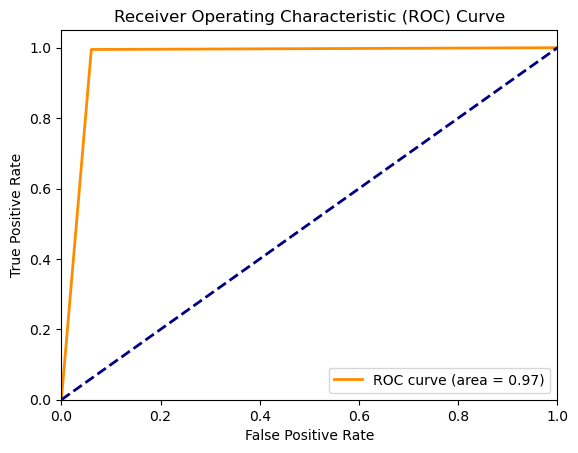

In [62]:
import numpy as np
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_test_encoded, y_pred_binary)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


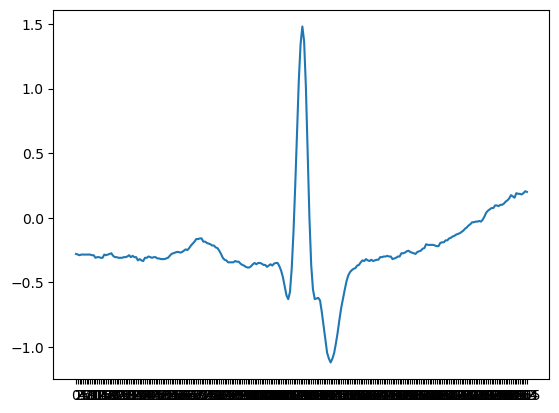

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Abnormal


In [141]:
import random
import numpy as np

# Generate a random index to select a sample from X_test
random_signal_index = random.randint(0, len(X_test))

# Plot the selected sample
plt.plot(X_test.iloc[random_signal_index])
plt.show()

# Get the corresponding input data (V)
V = X_test.iloc[random_signal_index].values

# Reshape input data to match model's input shape
V_reshaped = V.reshape((-1,256, ))

# Predict using the reshaped sample
y_pred = model.predict(V_reshaped)

# Check the prediction
if y_pred > 0.5:
    print('Normal')
else:
    print('Abnormal')

In [142]:
y_true = y_test_encoded[random_signal_index]

# Display the true label
if y_true == 1:
    print('True Label: Normal')
else:
    print('True Label: Abnormal')


True Label: Abnormal
